LetsGrowMore

Task 3: Music Recommendation

Done By: Yash Rai

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import gc
import lightgbm as lgb
from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Link for the dataset: https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data
data_path = '/content/gdrive/My Drive/Data/'
train = pd.read_csv(data_path+'/train.csv')
test = pd.read_csv(data_path+'/test.csv')
songs = pd.read_csv(data_path+'/songs.csv')
members = pd.read_csv(data_path+'/members.csv')
song_extra_info = pd.read_csv(data_path+'/song_extra_info.csv')

In [4]:
# Printing the first 5 rows of the dataset: train
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
# Printing the first 5 rows of the dataset: test
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [6]:
# Printing the first 5 rows of the dataset: songs
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
# Printing the first 5 rows of the dataset: members
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [8]:
# Printing the first 5 rows of the dataset: song_extra_info
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [9]:
# Printing the last 5 rows of the dataset: train
train.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1
7377417,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,Ju0VGkjWeBUZCd7r5Az2hUImhMoWxWLUicOedsmvG0g=,discover,Discover Genre,online-playlist,1


In [10]:
# Printing the last 5 rows of the dataset: test
test.tail()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist
2556789,2556789,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ftPDlhAywvcZX7ojE6F+9CDsC22UKX96iEr4W0ciPec=,discover,NaN,online-playlist


In [11]:
# Printing the last 5 rows of the dataset: songs
songs.tail()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0
2296319,V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=,270466,829,Kim Robertson,NaN,NaN,52.0


In [12]:
# Printing the last 5 rows of the dataset: members
members.tail()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


In [13]:
# Printing the last 5 rows of the dataset: song_extra_info
song_extra_info.tail()

,song_id,name,isrc
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095
2295970,DYKJKSgDOKxb19XzOVO81176qTH0OIHCsfzFRm/BG+g=,Like This,US5UL1512426


In [14]:
# Printing all the columns in the dataset: train
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [15]:
# Printing all the columns in the dataset: test
test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')

In [16]:
# Printing all the columns in the dataset: songs
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [17]:
# Printing all the columns in the dataset: members
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [18]:
# Printing all the columns in the dataset: song_extra_info
song_extra_info.columns

Index(['song_id', 'name', 'isrc'], dtype='object')

In [19]:
# Printing the shape of the dataset: train
train.shape

(7377418, 6)

In [20]:
# Printing the shape of the dataset: test
test.shape

(2556790, 6)

In [21]:
# Printing the shape of the dataset: songs
songs.shape

(2296320, 7)

In [22]:
# Printing the shape of the dataset: members
members.shape

(34403, 7)

In [23]:
# Printing the shape of the dataset: song_extra_info
song_extra_info.shape

(2295971, 3)

In [24]:
# Printing the full summary of the dataframe: train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [25]:
# Printing the full summary of the dataframe: test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [26]:
# Printing the full summary of the dataframe: songs
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [27]:
# Printing the full summary of the dataframe: members
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [28]:
# Printing the full summary of the dataframe: song_extra_info
song_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [29]:
# Checking missing values: train
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [30]:
# Checking missing values: test
test.isnull().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

In [31]:
# Checking missing values: songs
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [32]:
# Checking missing values: members
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [33]:
# Checking missing values: song_extra_info
song_extra_info.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [34]:
# Train data analysis
def count_plot(data, x, hue, type):
  '''Function to plot histograms with respect to argument type (category/target)'''
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, hue=hue, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot for {0} in {1} data'.format(x, type),fontsize=30)
  plt.tight_layout()

In [35]:
def count_plot_function(data, x):
  '''Function to plot histograms for categories'''
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot',fontsize=30)
  plt.tight_layout()

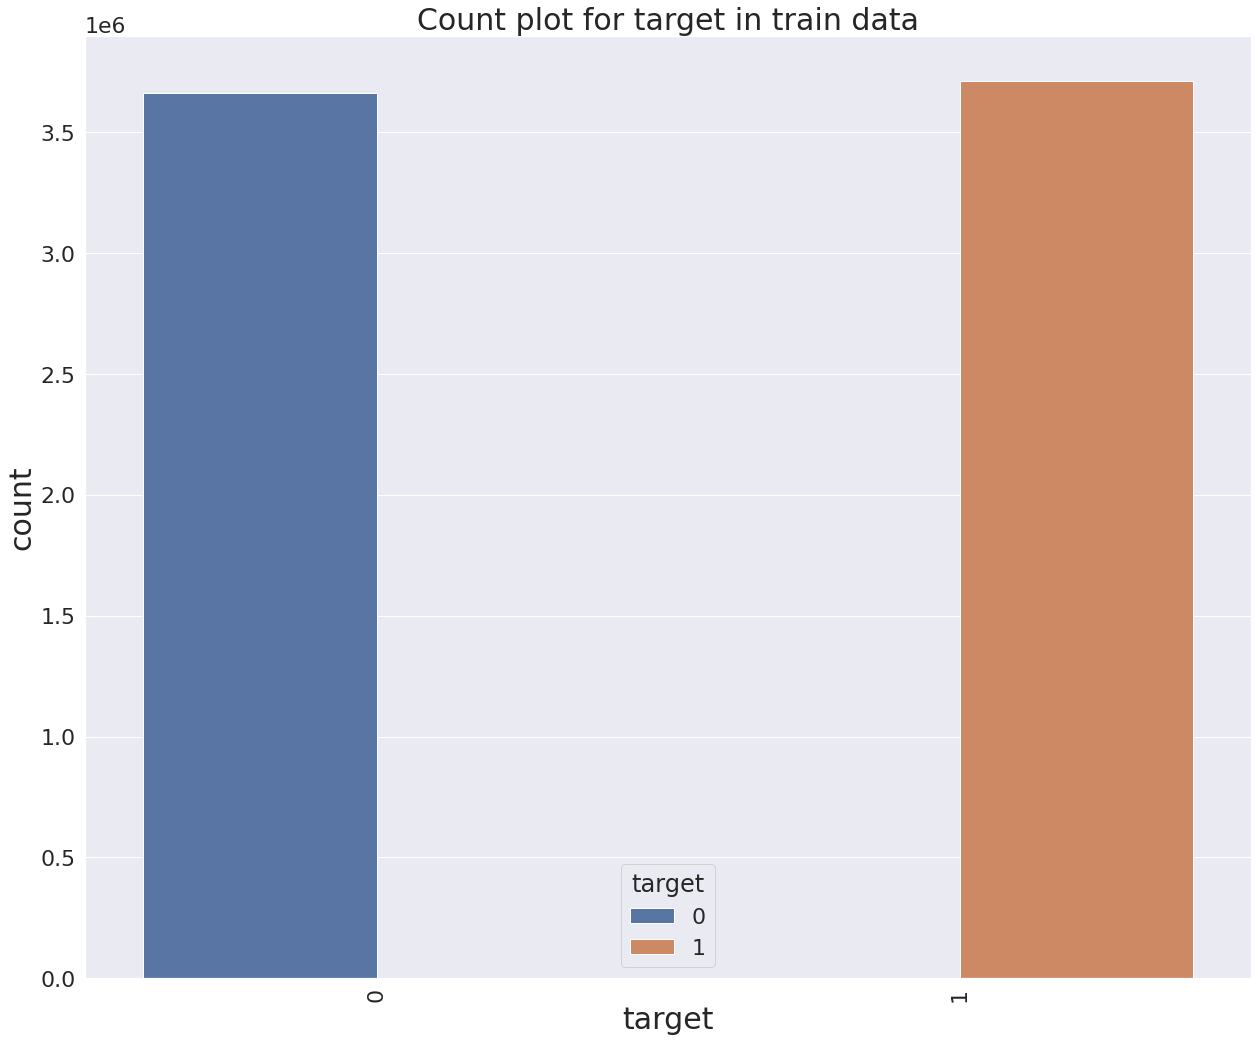

In [36]:
count_plot(train, 'target', 'target', 'train')

In [37]:
print('Data for label 1 : {:.4f}%'.format(train['target'].value_counts()[0]/train.shape[0] * 100))
print('Data for label 0 : {:.4f}%'.format(train['target'].value_counts()[1]/train.shape[0] * 100))

Data for label 1 : 49.6483%
Data for label 0 : 50.3517%


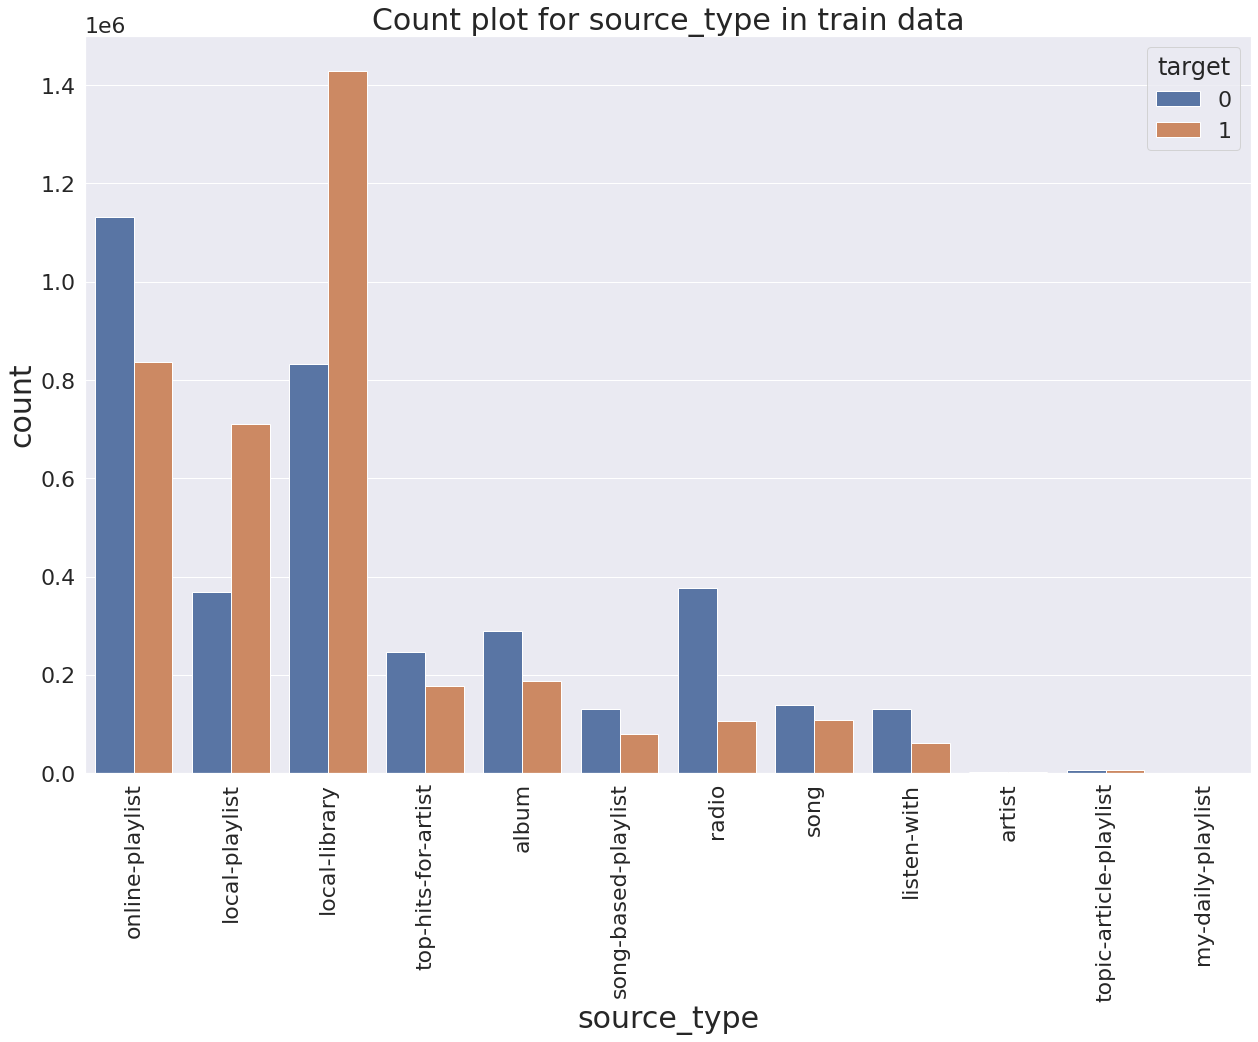

In [38]:
count_plot(train, 'source_type', 'target', 'train')

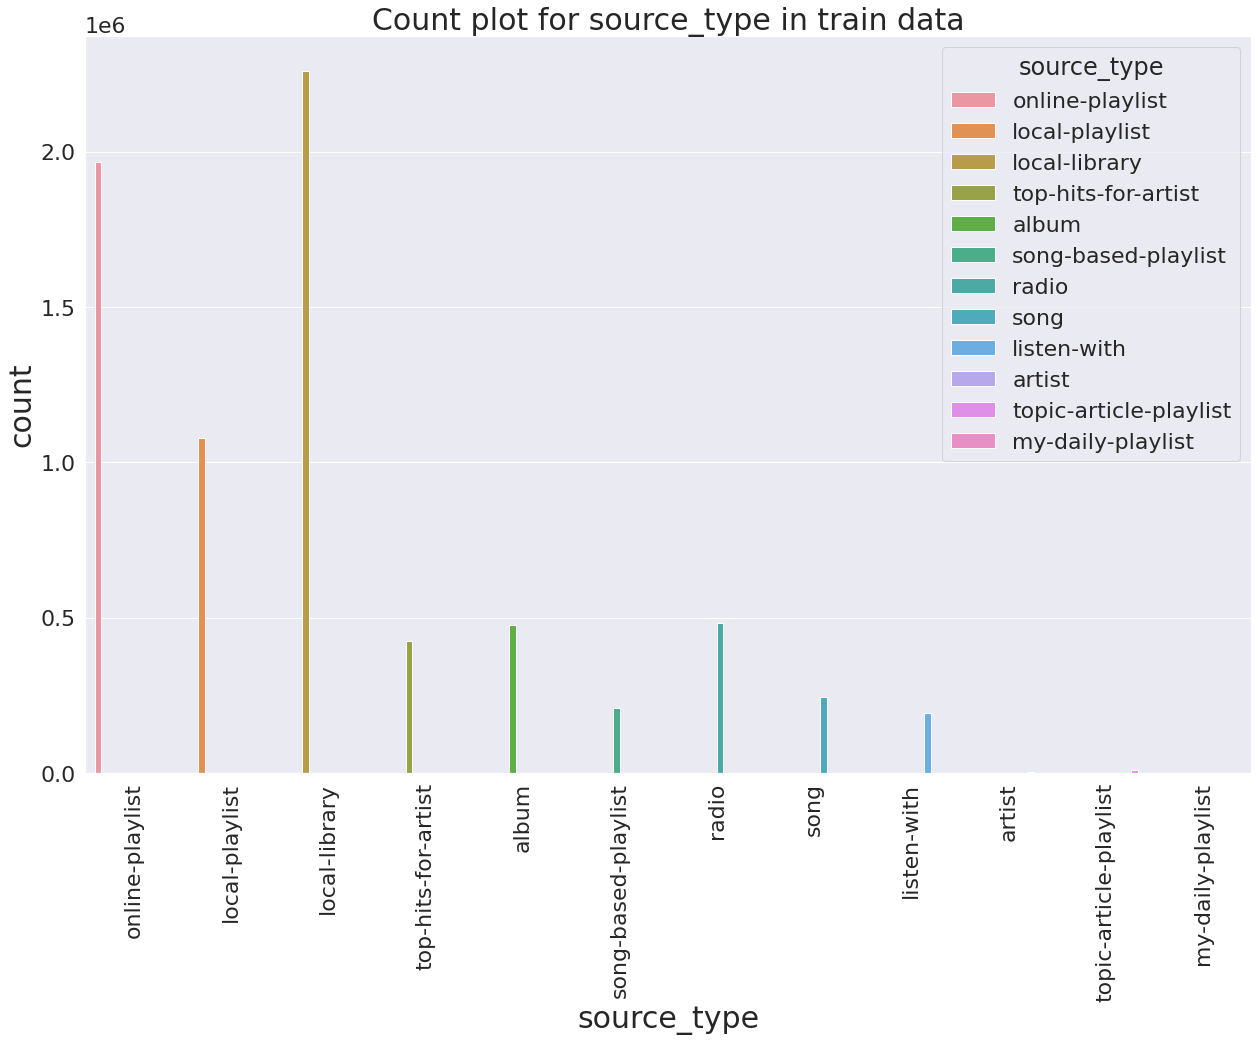

In [39]:
count_plot(train, 'source_type', 'source_type', 'train')

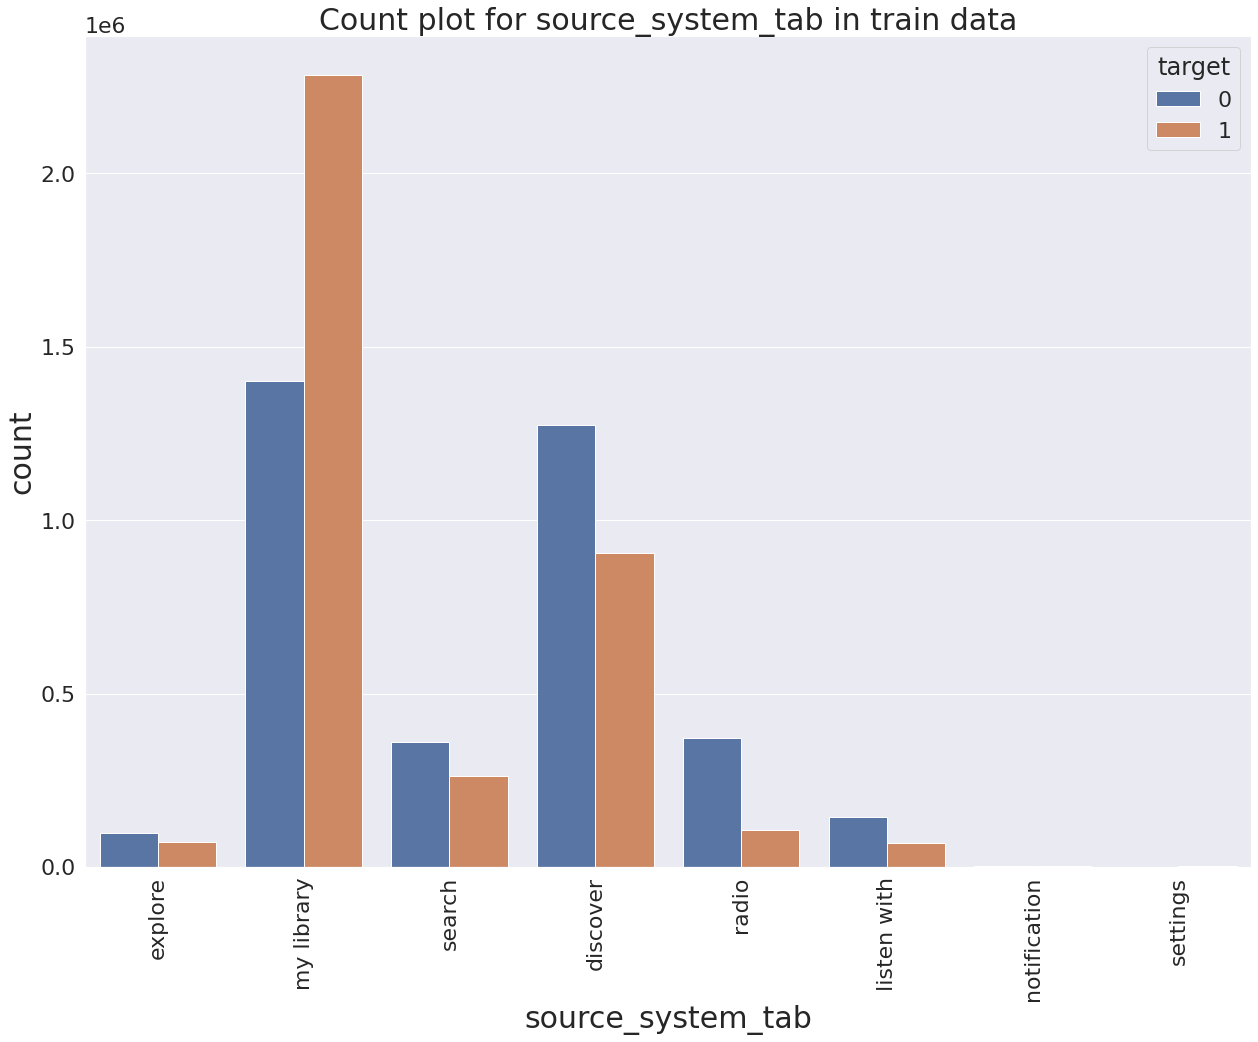

In [40]:
count_plot(train, 'source_system_tab', 'target', 'train')

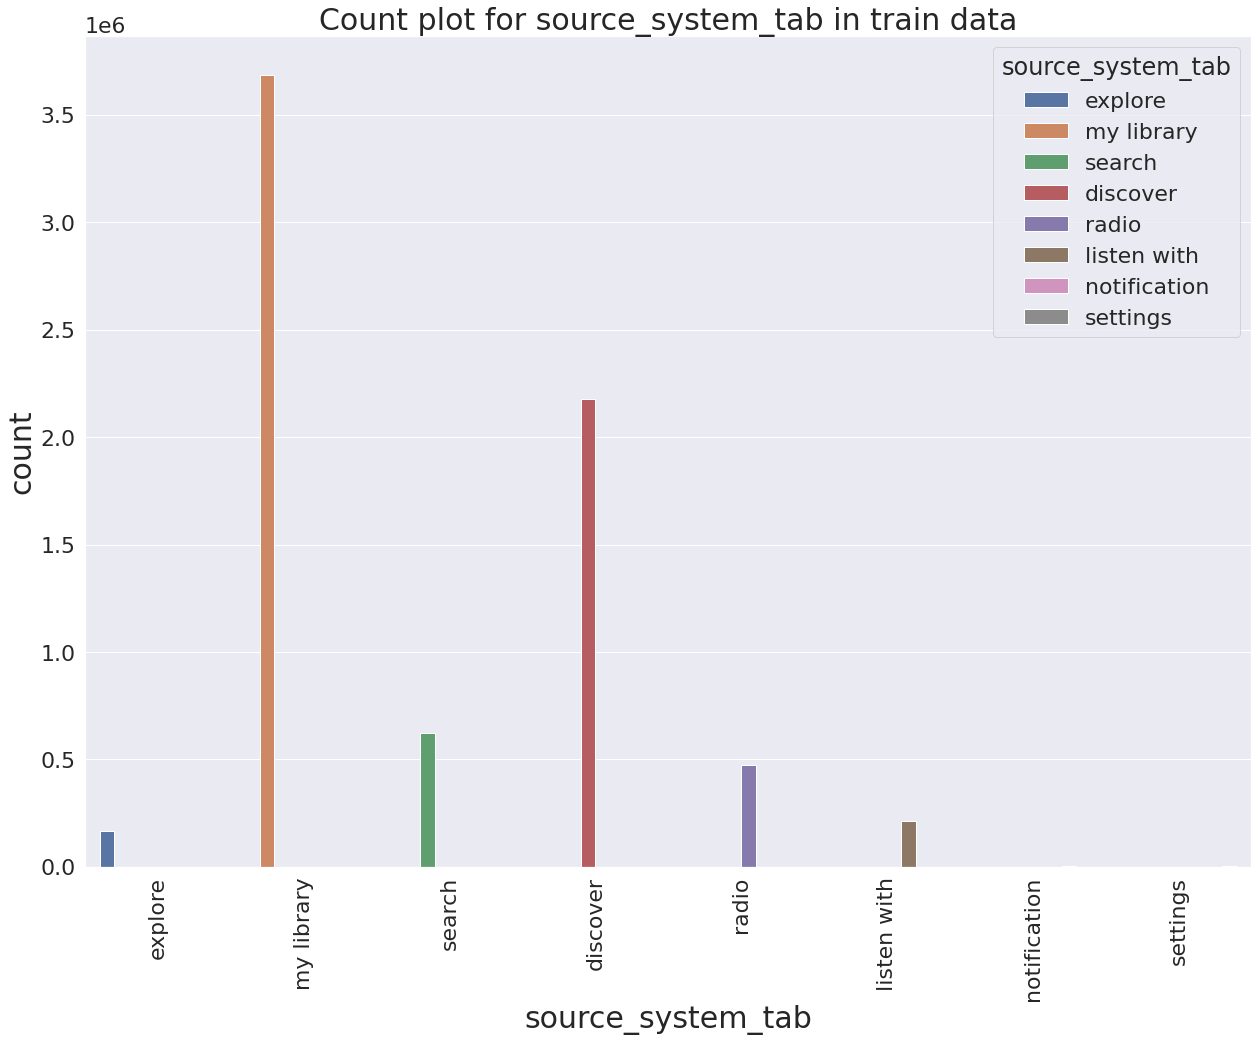

In [41]:
count_plot(train, 'source_system_tab', 'source_system_tab', 'train')

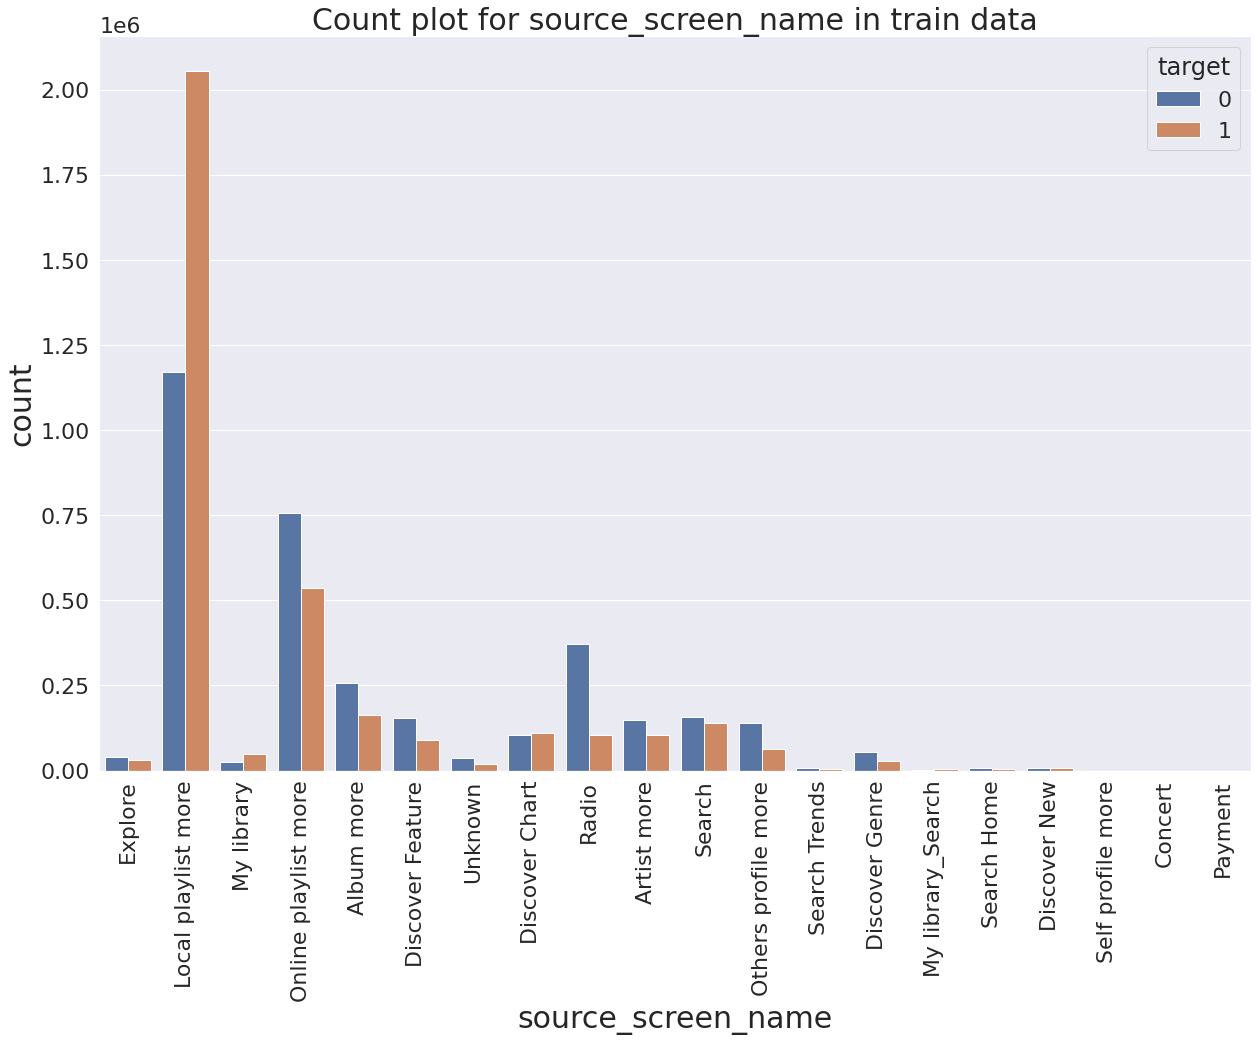

In [42]:
count_plot(train, 'source_screen_name', 'target', 'train')

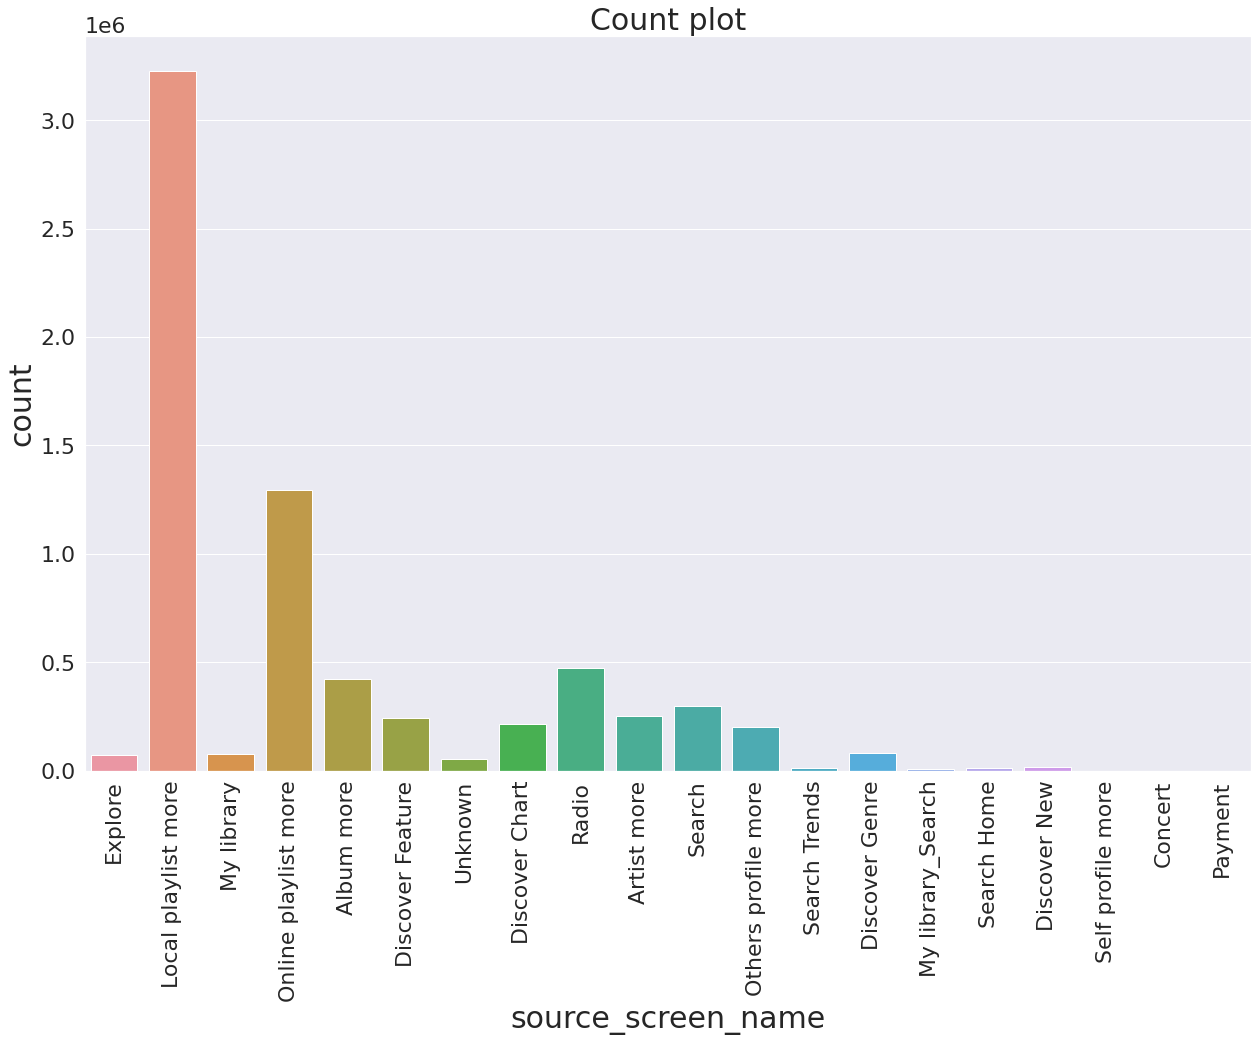

In [43]:
count_plot_function(train, 'source_screen_name')

In [44]:
# Members data analysis
def count_plot_function(data, x):
  '''Function to plot histograms for categories'''
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot',fontsize=30)
  plt.tight_layout()

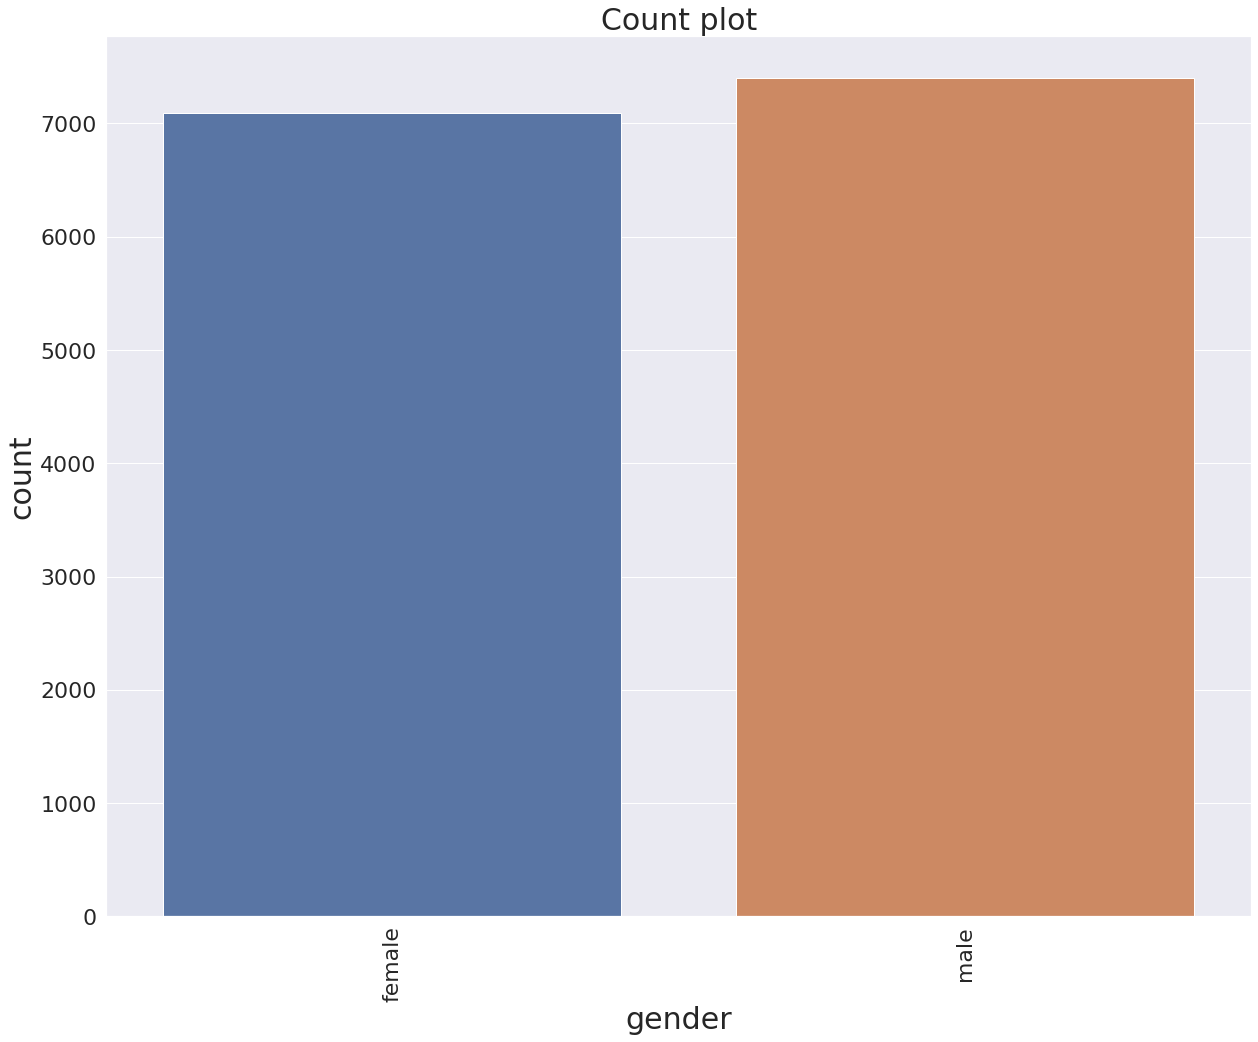

In [45]:
count_plot_function(members, 'gender')

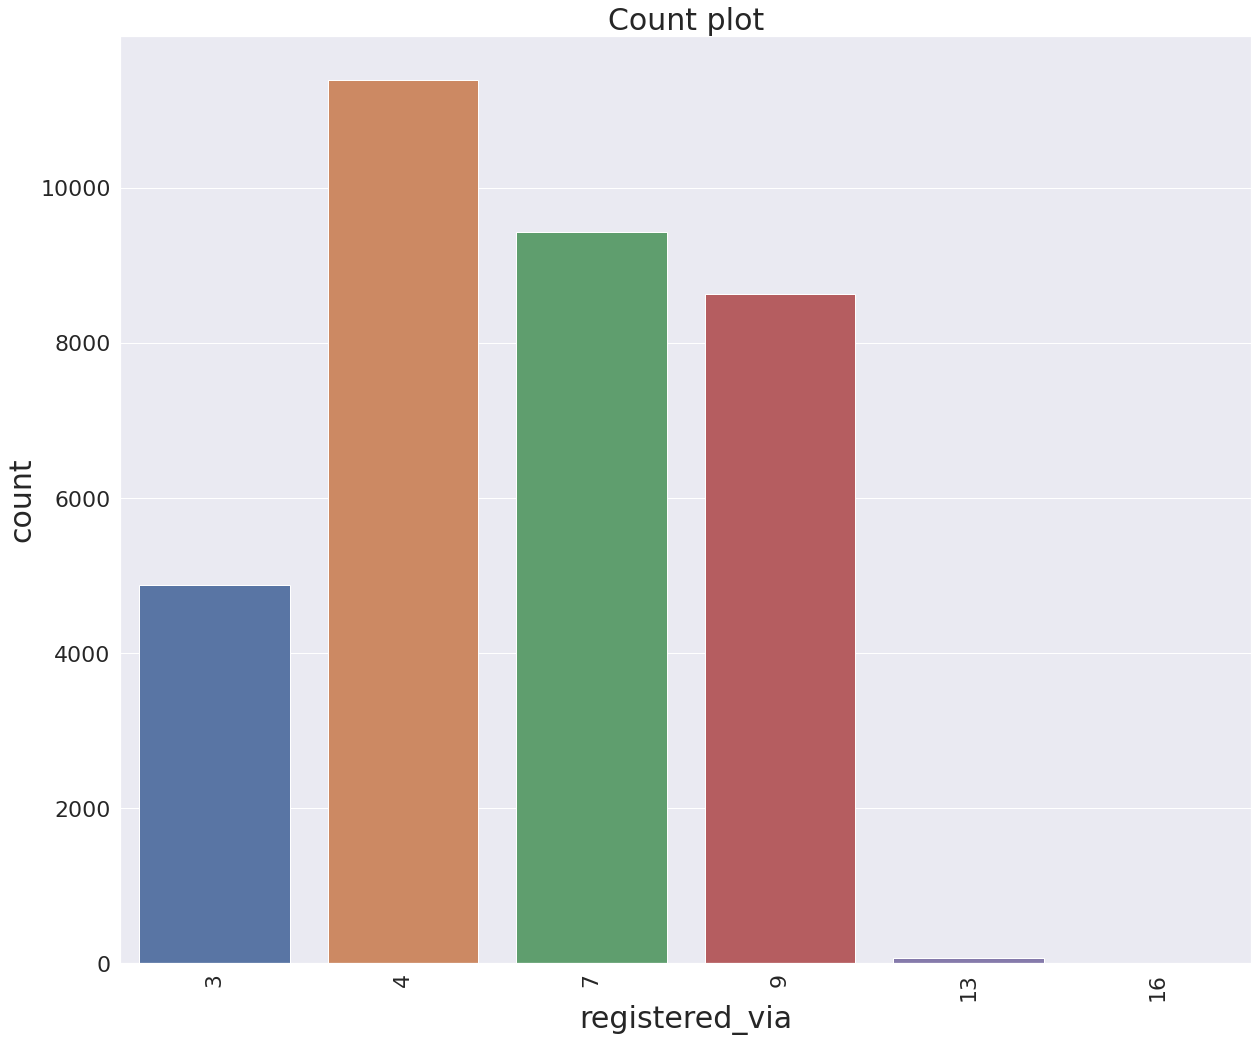

In [46]:
count_plot_function(members, 'registered_via')

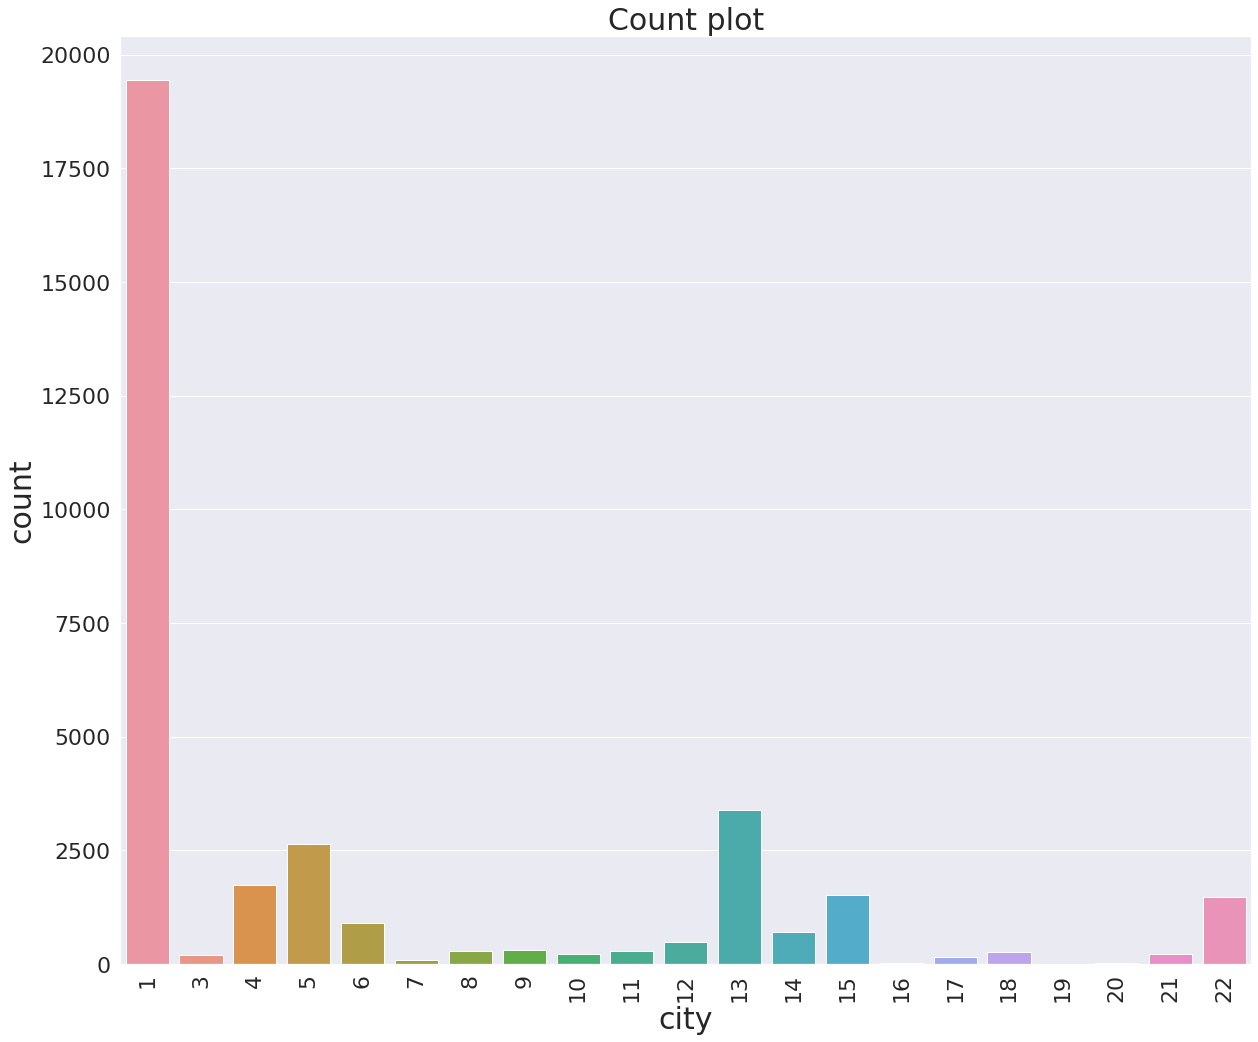

In [47]:
count_plot_function(members, 'city')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for registration')

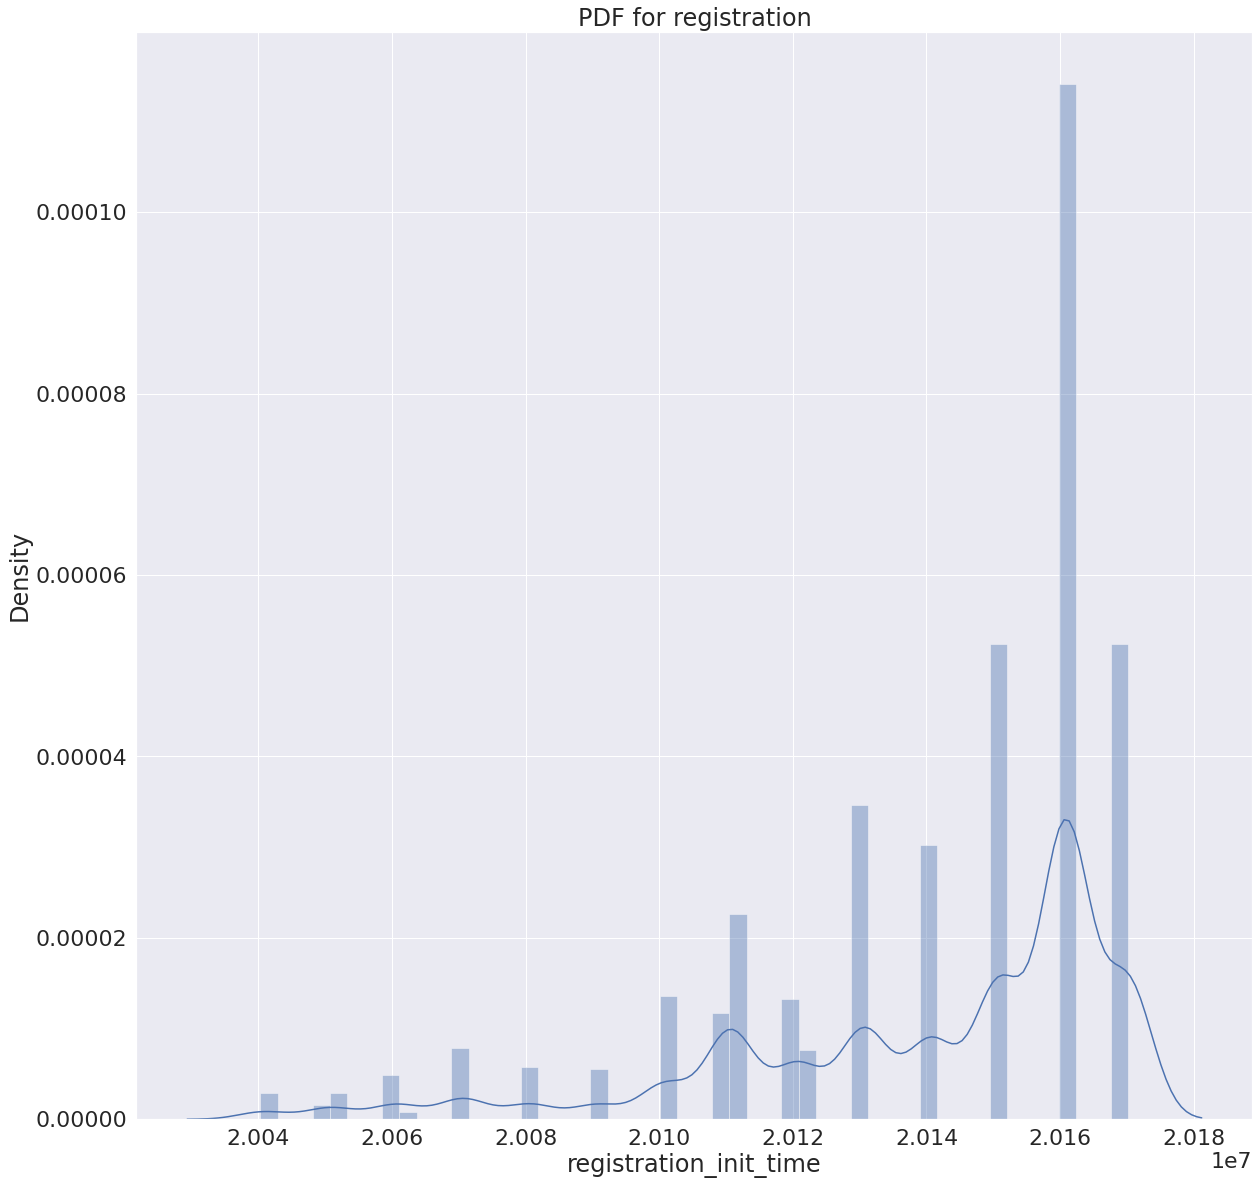

In [48]:
plt.figure(figsize = (20, 20)) 
sns.distplot(members.registration_init_time)
sns.set(font_scale=2)
plt.title('PDF for registration')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for registration')

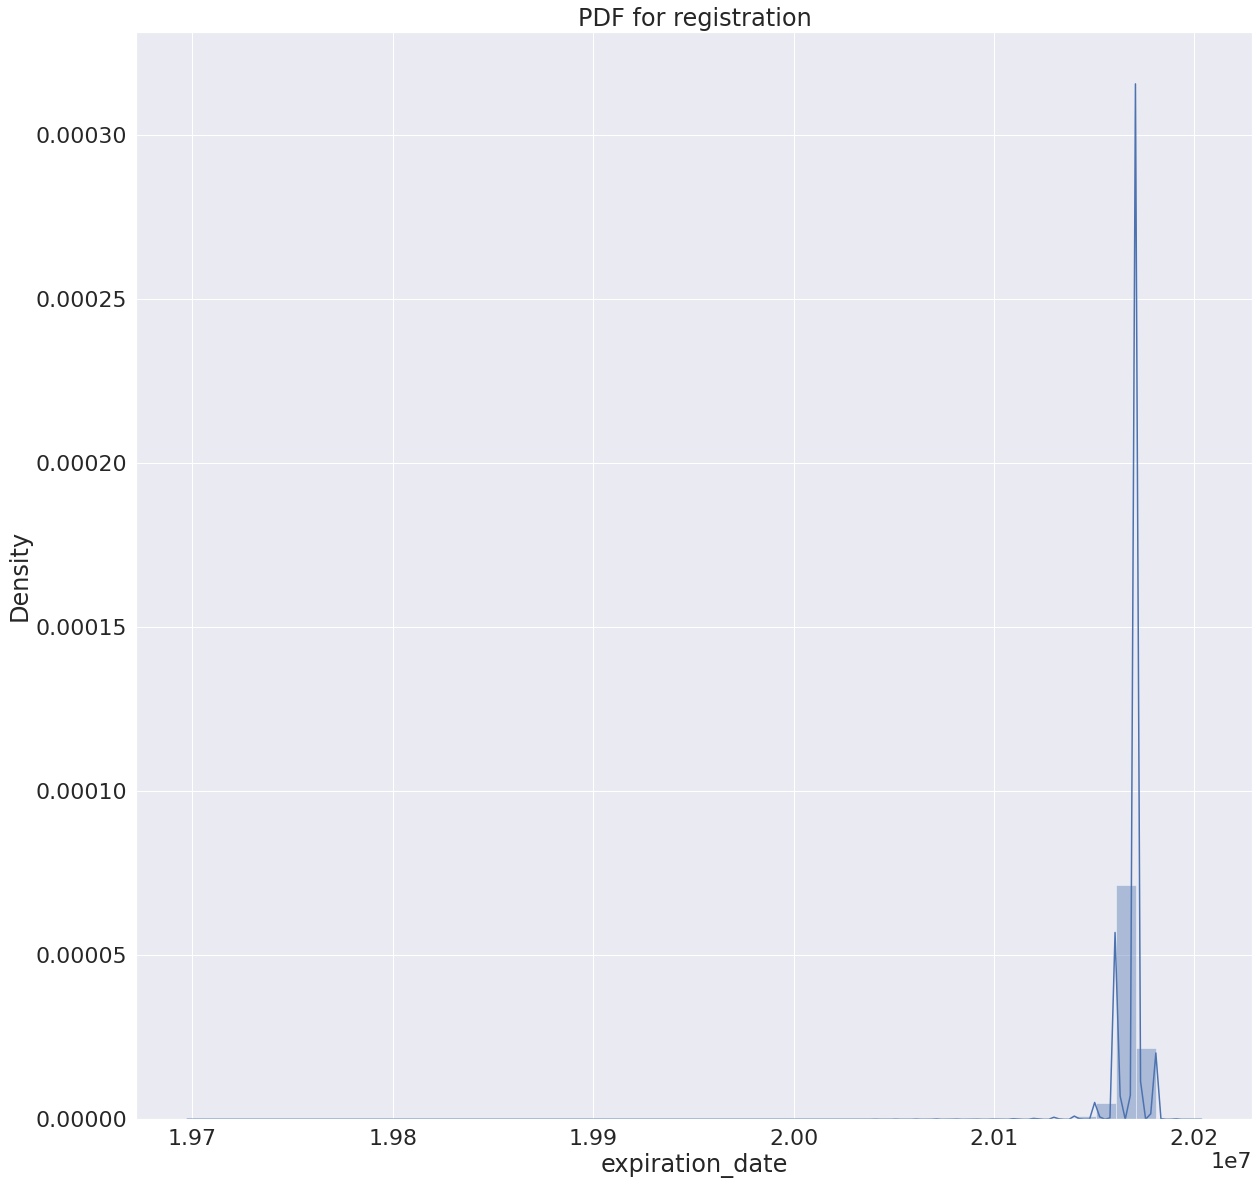

In [49]:
plt.figure(figsize = (20, 20)) 
sns.distplot(members['expiration_date'])
sns.set(font_scale=2)
plt.title('PDF for registration')

In [50]:
members.bd.unique()

array([   0,   43,   28,   33,   20,   30,   29,   26,   25,   21,   22,
         16,   23,   37,   18,   19,   51,   24,   17,   45,   36,   57,
         27,   34,   32,   15,   48,   50,   54,   47,   35,   46,   31,
         14,   41,   59,    2,   40,   38,   55,   39,   73,   49,   44,
        103,   52,   70,   42,   65,   56,  101,   58,   53,   64,   63,
         76,   66,   97,    3,   72,   67,   62,   61,  105,   60,   13,
         90,   12,   68,  131,   74,   89,  931,  -38,  144,   85,  112,
         96,   11,  102,   83, 1051,   87,    7,   95,  -43,  111,   93,
          5,   78, 1030,  106,  107,   82,   10])

In [51]:
def plot_pdf_cdf(x, flag):
  '''Function to plot pdf and cdf'''
  plt.figure(figsize = (15, 10)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)
    plt.title('CDF for age')
  else:
    sns.distplot(x)
    plt.title('PDF for age')
  sns.set(font_scale=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


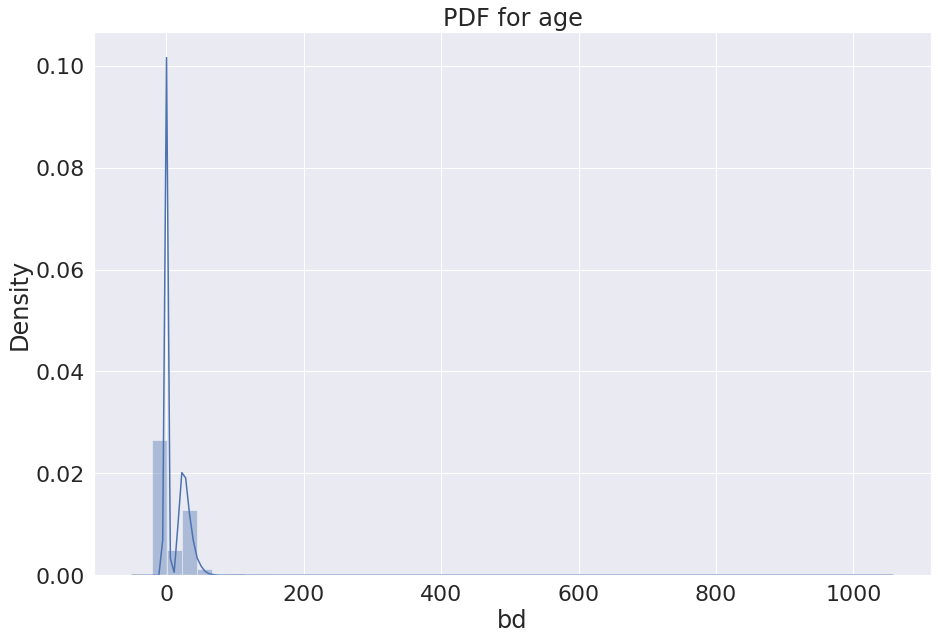

In [52]:
plot_pdf_cdf(members['bd'], False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


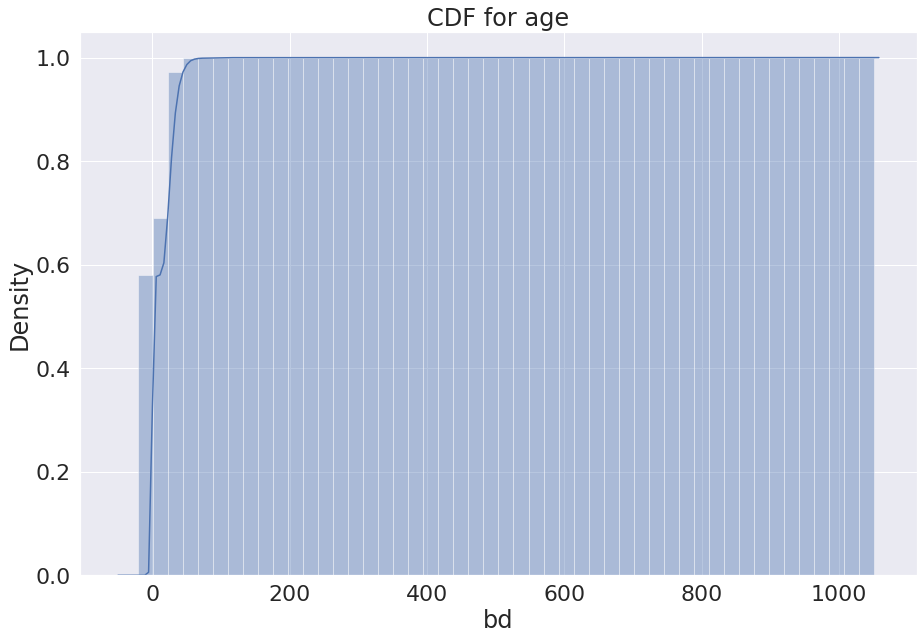

In [53]:
plot_pdf_cdf(members['bd'], True)

In [54]:
np.percentile(members['bd'].values, 98)

47.0

In [55]:
# Songs data analysis
# Merging two files: songs and song_extra_info on 'song_id'
songs_all_info = songs.merge(song_extra_info, on='song_id')

In [56]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan

songs_all_info['song_year'] = songs_all_info['isrc'].apply(isrc_to_year)

In [57]:
songs_all_info['language'].unique()

array([ 3., 31., 52., 17., 10., -1., 24., 59., 45., 38., nan])

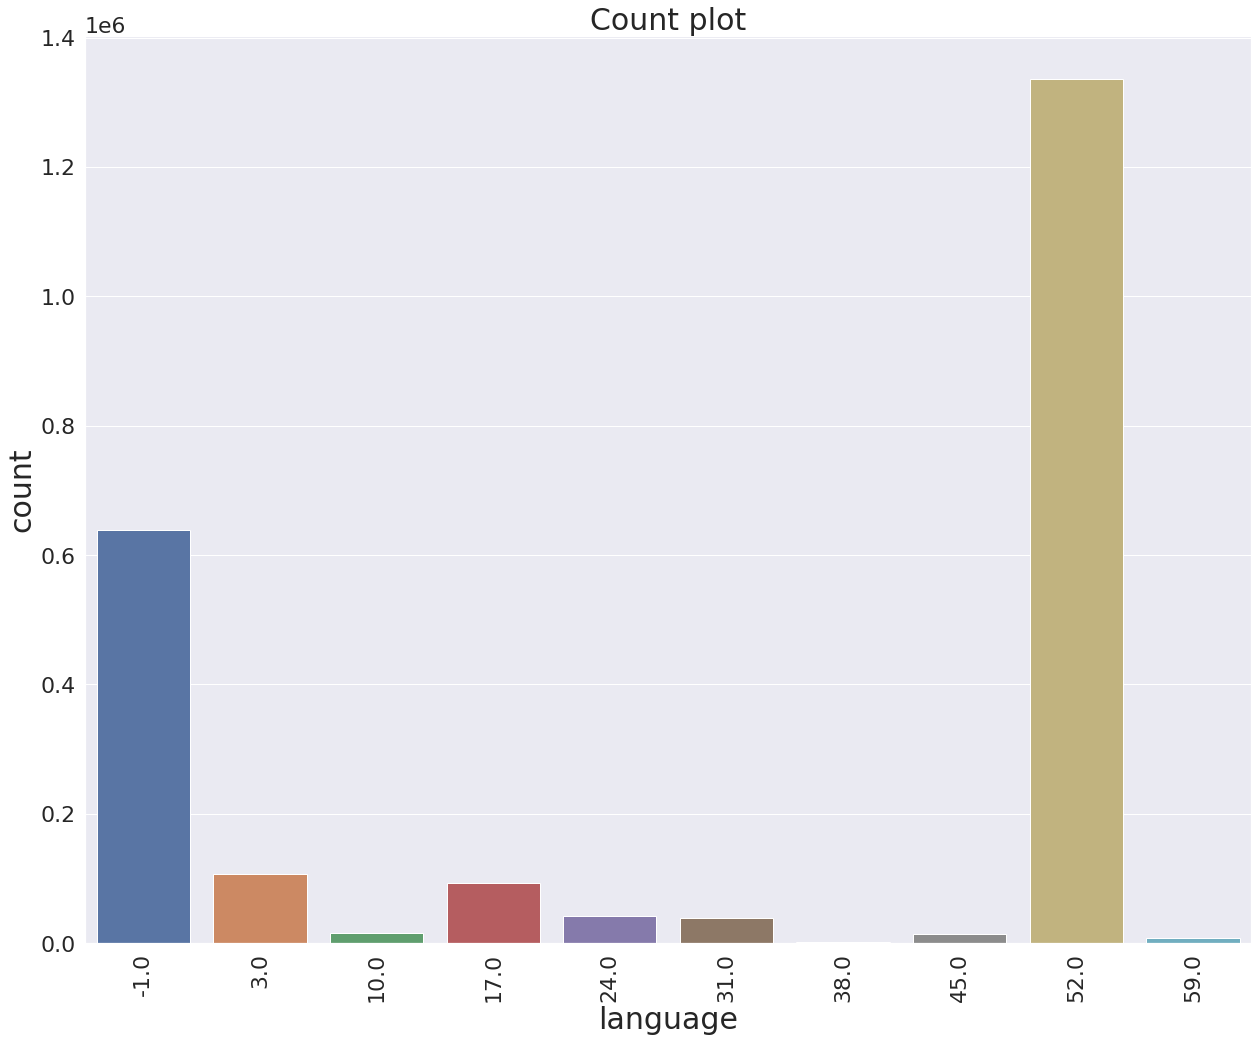

In [58]:
count_plot_function(songs_all_info, 'language')

In [59]:
# Merging of data and analysis
# Missing values
def check_missing_values(df):
  '''Function to check missing values in df'''
  for col in df.columns:
    nan_count = df[col].isnull().sum()
    total = df.shape[0]
    percentage = nan_count/total * 100
    print(col, 'has {:.2f}% missing values'.format(percentage))

In [60]:
print('Missing values analysis for train data')
check_missing_values(train)

Missing values analysis for train data
msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.34% missing values
source_screen_name has 5.62% missing values
source_type has 0.29% missing values
target has 0.00% missing values


In [61]:
print('Missing values analysis for memebrs data')
check_missing_values(members)

Missing values analysis for memebrs data
msno has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 57.85% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values


In [62]:
print('Missing values analysis for songs data')
check_missing_values(songs)

Missing values analysis for songs data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 4.10% missing values
artist_name has 0.00% missing values
composer has 46.66% missing values
lyricist has 84.71% missing values
language has 0.00% missing values


In [63]:
print('Missing values analysis for songs_all_info data')
check_missing_values(songs_all_info)

Missing values analysis for songs_all_info data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 4.10% missing values
artist_name has 0.00% missing values
composer has 46.66% missing values
lyricist has 84.71% missing values
language has 0.00% missing values
name has 0.00% missing values
isrc has 5.95% missing values
song_year has 5.95% missing values


In [64]:
train_members = pd.merge(train, members, on='msno', how='left')
train_merged = pd.merge(train_members, songs_all_info, on='song_id', how='left')

In [65]:
test_members = pd.merge(test, members, on='msno', how='left')
test_merged = pd.merge(test_members, songs_all_info, on='song_id', how='left')

In [66]:
del train_members
del test_members

In [67]:
check_missing_values(train_merged)

msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.34% missing values
source_screen_name has 5.62% missing values
source_type has 0.29% missing values
target has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 40.14% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values
song_length has 0.02% missing values
genre_ids has 1.63% missing values
artist_name has 0.02% missing values
composer has 22.73% missing values
lyricist has 43.10% missing values
language has 0.02% missing values
name has 0.02% missing values
isrc has 7.83% missing values
song_year has 7.83% missing values


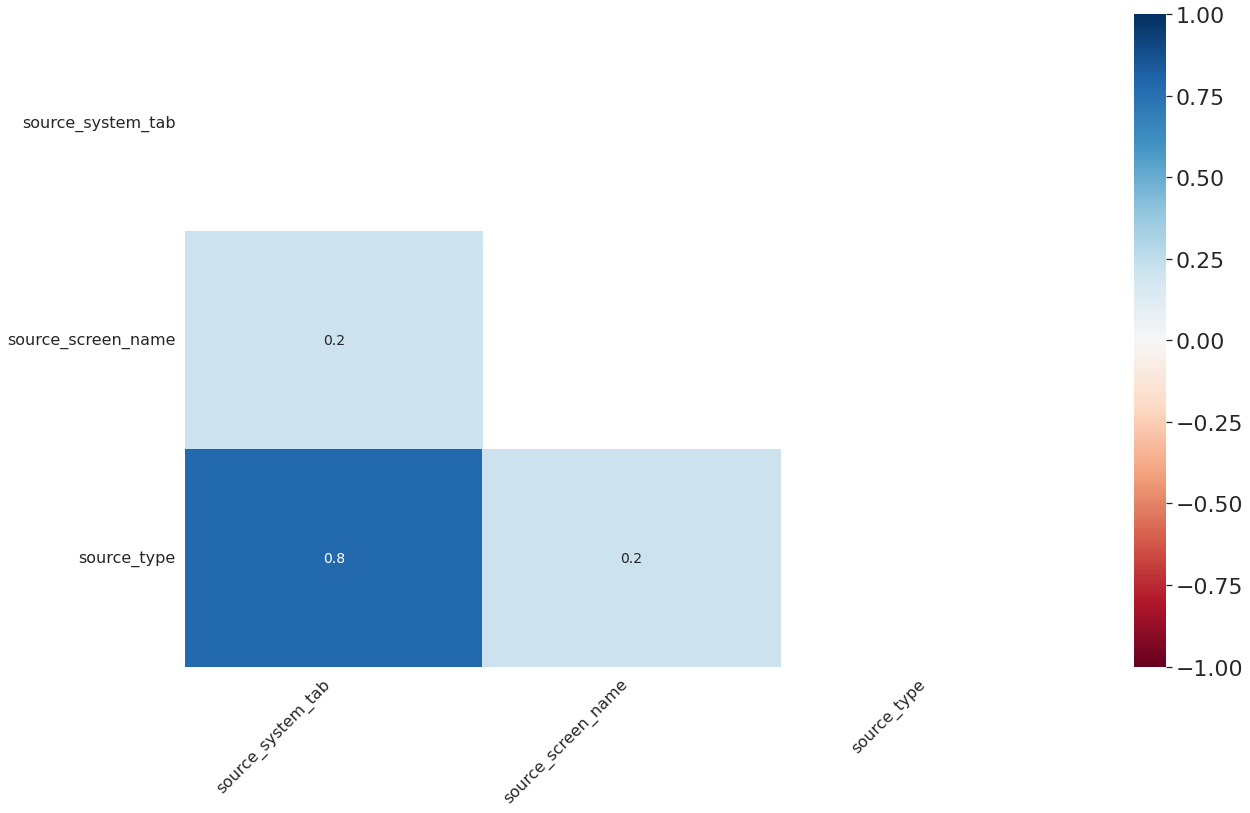

In [68]:
msno.heatmap(train)

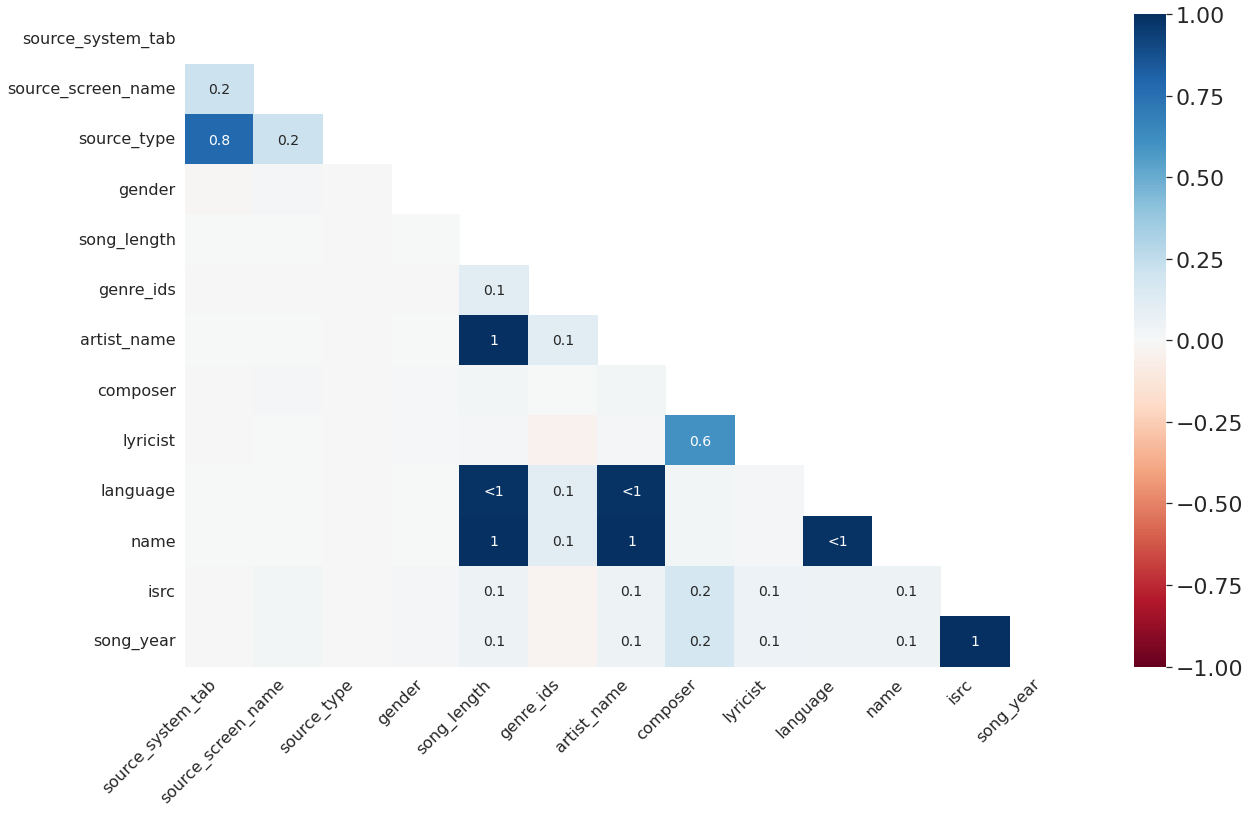

In [69]:
msno.heatmap(train_merged)

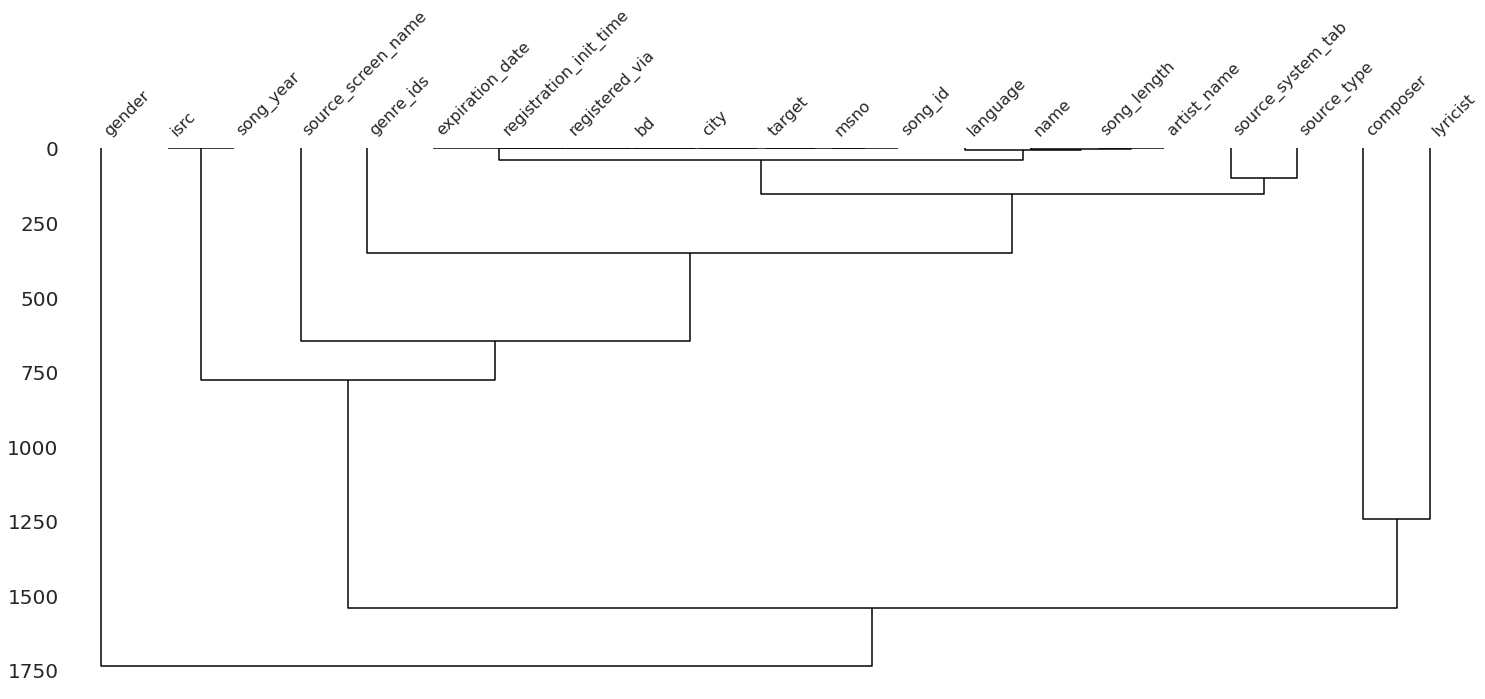

In [70]:
msno.dendrogram(train_merged)

In [71]:
# Feature Engineering
del train, test, members, songs, song_extra_info

In [72]:
# Importing Libraries
import time
import numpy as np
import pandas as pd
import lightgbm as lgb
import gc

In [73]:
# Reading the datasets
# Link for the dataset: https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data
members = pd.read_csv(data_path + 'members.csv')
songs = pd.read_csv(data_path + 'songs.csv')
songs_extra = pd.read_csv(data_path + 'song_extra_info.csv')
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

In [74]:
# Splitting data
# As the data is oredered in chronological order so, we will take 80% train and 20% val data from train data
tr_index = train.shape[0] * 8 // 10

In [75]:
train_data = train.iloc[:tr_index]
val_data = train.iloc[tr_index:]
print(train_data.shape, val_data.shape, test.shape)

(5901934, 6) (1475484, 6) (2556790, 6)


In [76]:
# Merging data with members, songs and songs_extra
# Merge with members
train_members = pd.merge(train_data, members, on='msno', how='left')
val_members = pd.merge(val_data, members, on='msno', how='left')
test_members = pd.merge(test, members, on='msno', how='left')

In [77]:
# Merge songs and songs_extra
songs_all = pd.merge(songs, songs_extra, on='song_id', how='left')

In [78]:
# Merge with members
train_all = pd.merge(train_members, songs_all, on='song_id', how='left')
val_all = pd.merge(val_members, songs_all, on='song_id', how='left')
test_all = pd.merge(test_members, songs_all, on='song_id', how='left')

In [79]:
del train_members
del val_members
del test_members
del songs_all

In [80]:
del train_data
del val_data

In [81]:
del train, test

In [82]:
# F.E. for Members
def filter_age(x):
  # 98th percentile is 47
  '''Function to fix age value between 0 to 75'''
  if x >= 0 and x <= 75:
    return x
  else:
    return np.nan

train_all['bd'] = train_all['bd'].apply(filter_age)
val_all['bd'] = val_all['bd'].apply(filter_age)
test_all['bd'] = test_all['bd'].apply(filter_age)

In [83]:
def extract_date_fatures(data):
  '''Function to extract features like day, month, year from dates.'''
  # convert into date format
  data['expiration_date'] = pd.to_datetime(data['expiration_date'], format='%Y%m%d')
  data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')
  
  # get membership period from registration and expiration dates
  data['membership_days'] = data['expiration_date'].subtract(data['registration_init_time']).dt.days.astype(int)

  # extract year, month and day from dates
  data['registration_year'] = data['registration_init_time'].dt.year
  data['registration_month'] = data['registration_init_time'].dt.month
  data['registration_day'] = data['registration_init_time'].dt.day

  data['expiration_year'] = data['expiration_date'].dt.year
  data['expiration_month'] = data['expiration_date'].dt.month
  data['expiration_day'] = data['expiration_date'].dt.day

  return data

train_all = extract_date_fatures(train_all)
val_all = extract_date_fatures(val_all)
test_all = extract_date_fatures(test_all)

In [84]:
# F.E for Songs
train_all.tail(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,membership_days,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
5901931,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,b8Ec5KHbhiJc+Aeg4hgVx7mkdk5UlDZyW48Y1OfyqBU=,my library,Local playlist more,local-library,1,1,18.0,female,3,2015-03-21,2017-10-05,214517.0,465,劉思涵 (Koala Liu),王于陞,安立奎,3.0,走在冷風中,TWF711100078,929,2015,3,21,2017,10,5
5901932,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,fwaxN4NL0q27tHQq4VEPCKVTywMIGqImrgRvFLnrVJw=,my library,Local playlist more,local-library,1,1,18.0,female,3,2015-03-21,2017-10-05,283167.0,465,楊培安 (Roger Yang),Du Zhi Wen,Qian Zi,3.0,說好各走五十步,TWA531302103,929,2015,3,21,2017,10,5
5901933,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,yqZjiUmLn/+h6g047I0LNxX3UoS60z3PJacJOFcxFMU=,my library,Local playlist more,local-library,0,1,18.0,female,3,2015-03-21,2017-10-05,204335.0,359,Tegan And Sara,NaN,NaN,52.0,I Was a Fool,USWB11203029,929,2015,3,21,2017,10,5


In [85]:
# Checking missing values
train_all.isnull().any()

msno                      False
song_id                   False
source_system_tab          True
source_screen_name         True
source_type                True
target                    False
city                      False
bd                         True
gender                     True
registered_via            False
registration_init_time    False
expiration_date           False
song_length                True
genre_ids                  True
artist_name                True
composer                   True
lyricist                   True
language                   True
name                       True
isrc                       True
membership_days           False
registration_year         False
registration_month        False
registration_day          False
expiration_year           False
expiration_month          False
expiration_day            False
dtype: bool

In [86]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901934 entries, 0 to 5901933
Data columns (total 27 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   city                    int64         
 7   bd                      float64       
 8   gender                  object        
 9   registered_via          int64         
 10  registration_init_time  datetime64[ns]
 11  expiration_date         datetime64[ns]
 12  song_length             float64       
 13  genre_ids               object        
 14  artist_name             object        
 15  composer                object        
 16  lyricist                object        
 17  language                float64       
 18  na

In [87]:
# Filling missing values
def filling_missing_values(data):
  data['source_system_tab'].fillna('no_system_tab', inplace=True)
  data['source_screen_name'].fillna('no_screen_name', inplace=True)
  data['source_type'].fillna('np_source_type', inplace=True)
  data['bd'].fillna(0, inplace=True)
  data['gender'].fillna('gender_missing', inplace=True)
  data['song_length'].fillna(0, inplace=True)
  data['genre_ids'].fillna(0, inplace=True)
  data['lyricist'].fillna('no_lyricist', inplace=True)
  data['artist_name'].fillna('no_artist_name', inplace=True)
  data['composer'].fillna('no_composer', inplace=True)
  data['language'].fillna('no_language', inplace=True)
  data['name'].fillna('no_name', inplace=True)
  return data

train_all = filling_missing_values(train_all)
val_all = filling_missing_values(val_all)
test_all = filling_missing_values(test_all)

In [88]:
# F.E. for Genre
def generate_genre_ids(data):
  '''Function to sepearate each genre_id and count total number of genre_ids'''
  genre_ids_matrix = np.zeros((data.shape[0], 4))

  for i in range(data.shape[0]):
    ids = str(data['genre_ids'].values[i]).split('|')
    if len(ids) > 2:
        genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 1] = (ids[1])
        genre_ids_matrix[i, 2] = (ids[2])
    elif len(ids) > 1:
        genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 1] = (ids[1])
    elif len(ids) == 1:
        genre_ids_matrix[i, 0] = (ids[0])
    genre_ids_matrix[i, 3] = len(ids)

  data['first_genre_id'] = genre_ids_matrix[:, 0] # keeps first genre_id
  data['second_genre_id'] = genre_ids_matrix[:, 1] # keeps second genre_id
  data['third_genre_id'] = genre_ids_matrix[:, 2] # keeps third genre_id
  data['genre_ids_count'] = genre_ids_matrix[:, 3] # keeps count of genre_ids
  return data

In [89]:
train_all = generate_genre_ids(train_all)
val_all = generate_genre_ids(val_all)
test_all = generate_genre_ids(test_all)

In [90]:
# Dropping 'composer' and 'lyricist' as they contains higher missing values.
train_all = train_all.drop(['composer', 'lyricist'], axis=1)
val_all = val_all.drop(['composer', 'lyricist'], axis=1)
test_all = test_all.drop(['composer', 'lyricist'], axis=1)

In [91]:
# F.E for Artist
def calculate_is_featured(data):
  '''Function to check 'feat' in artist field.'''
  data['is_featured'] = data['artist_name'].apply(lambda x: 1 if ' feat' in str(x) else 0).astype(np.int8)
  return data

In [92]:
train_all = calculate_is_featured(train_all)
val_all = calculate_is_featured(val_all)
test_all = calculate_is_featured(test_all)

In [93]:
def artist_count(x):
  '''Function to count total number of artists for each song'''
  return x.count('and') + x.count(',') + x.count(' feat') + x.count('&') + 1

def get_first_artist(x):
  '''Function to extract first artist name from more than one artists'''
  if x.count('and') > 0:
    x = x.split('and')[0]
  if x.count(',') > 0:
    x = x.split(',')[0]
  if x.count(' feat') > 0:
    x = x.split(' feat')[0]
  if x.count('&') > 0:
    x = x.split('&')[0]
  return x.strip()

In [94]:
def calculate_artist_features(data):
  '''Function to execute above both functions'''
  # get artist count 
  data['artist_count'] = data['artist_name'].apply(artist_count).astype(np.int8)
  # get first artist name
  data['first_artist_name'] = data['artist_name'].apply(get_first_artist)
  return data

In [95]:
train_all = calculate_artist_features(train_all)
val_all = calculate_artist_features(val_all)
test_all = calculate_artist_features(test_all)

In [96]:
# F.E. for Extra
def song_lang_boolean(x):
  '''Function to add language boolean feature'''
  if 17.0 == str(x) or 45.0 == str(x):
    return 1
  else:
    return 0
    
mean_song_length = np.mean(train_all['song_length'])
def smaller_song(x):
  '''Function to add song_size boolean feature'''
  if x < mean_song_length:
    return 1
  else:
    return 0

In [97]:
def calculate_language_features(data):
  data['song_lang_boolean'] = data['language'].apply(song_lang_boolean).astype(np.int8)
  data['song_size_boolean'] = data['song_length'].apply(smaller_song).astype(np.int8)
  return data

In [98]:
train_all = calculate_language_features(train_all)
val_all = calculate_language_features(val_all)
test_all = calculate_language_features(test_all)

In [99]:
# F.E for songs_extra
def calcualte_songs_features(data):
  '''Function to extract features from isrc.'''
  isrc = data['isrc']
  data['country_code'] = isrc.str.slice(0, 2)
  data['registration_code'] = isrc.str.slice(2, 5)
  data['song_year'] = isrc.str.slice(5, 7).astype(float)
  data['song_year'] = data['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)
  data['isrc_missing'] = (data['country_code'] == 0) * 1.0
  return data

In [100]:
train_all = calcualte_songs_features(train_all)
val_all = calcualte_songs_features(val_all)
test_all = calcualte_songs_features(test_all)

In [101]:
def filling_missing_isrc_values(data):
  '''Function to fill missing isrc values'''
  data['isrc'].fillna('no_isrc', inplace=True)
  data['country_code'].fillna('no_country_code', inplace=True)
  data['registration_code'].fillna('no_registration_code', inplace=True)
  data['song_year'].fillna('no_song_year', inplace=True)
  return data

train_all = filling_missing_isrc_values(train_all)
val_all = filling_missing_isrc_values(val_all)
test_all = filling_missing_isrc_values(test_all)

In [102]:
val_all.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'language', 'name', 'isrc', 'membership_days',
       'registration_year', 'registration_month', 'registration_day',
       'expiration_year', 'expiration_month', 'expiration_day',
       'first_genre_id', 'second_genre_id', 'third_genre_id',
       'genre_ids_count', 'is_featured', 'artist_count', 'first_artist_name',
       'song_lang_boolean', 'song_size_boolean', 'country_code',
       'registration_code', 'song_year', 'isrc_missing'],
      dtype='object')

In [103]:
# Group by features
def calculate_groupby_features(data):
  '''Function to calculate group by features on dataframe '''
  # song count for each user
  member_song_count = data.groupby('msno').count()['song_id'].to_dict()
  data['member_song_count'] = data['msno'].apply(lambda x: member_song_count[x])

  # song count for each artist
  artist_song_count = data.groupby('first_artist_name').count()['song_id'].to_dict()
  data['artist_song_count'] = data['first_artist_name'].apply(lambda x: artist_song_count[x])

  # song count for each genre_id
  first_genre_id_song_count = data.groupby('first_genre_id').count()['song_id'].to_dict()
  data['genre_song_count'] = data['first_genre_id'].apply(lambda x: first_genre_id_song_count[x])

  # song count for each lanugage
  lang_song_count = data.groupby('language').count()['song_id'].to_dict()
  data['lang_song_count'] = data['language'].apply(lambda x: lang_song_count[x])

  # user count for each song
  song_member_count = data.groupby('song_id').count()['msno'].to_dict()
  data['song_member_count'] = data['song_id'].apply(lambda x: song_member_count[x])

  # We can add group by  wrt 'age'
  age_song_count = data.groupby('bd').count()['song_id'].to_dict()
  data['age_song_count'] = data['bd'].apply(lambda x: age_song_count[x])
 
  return data

In [ ]:
train_all = calculate_groupby_features(train_all)
val_all = calculate_groupby_features(val_all)
test_all = calculate_groupby_features(test_all)

In [ ]:
train_all.to_csv(save_path + 'train_all_new.csv', index=False)
val_all.to_csv(save_path + 'val_all_new.csv', index=False)
test_all.to_csv(save_path + 'test_all_new.csv', index=False)